# Business problem <hr>
meningkatkan efisiensi dan efektivitas operasional pada bisnis Olist. Untuk itu, objective analisis dari dataset yang diberikan adalah sebagai berikut:

# Obejective <hr>
- Menganalisis trend sales dan product yang sering terbeli. <br>
- Mengalisa segment yang terdapat pada data customer dengan menggunakan metode KMEANS

# Import Library

In [207]:
#======== Connect to Database =====
import sqlite3

#===== Pandas Confiq ===
import pandas as pd
pd.set_option('display.max_columns',None)

#===== numpy =====
import numpy as np

#===== Visualization ====
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Connect to Database

In [208]:
conn = sqlite3.connect(r"D:\My Studying\pacmann\data wrangling\olist.db")
cur = conn.cursor()

In [209]:
# check table
cur.execute('''SELECT
                    name
                  FROM
                    sqlite_master
                    WHERE
                      type ='table'
                ''')
cur.fetchall()

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

# Combine Dataset

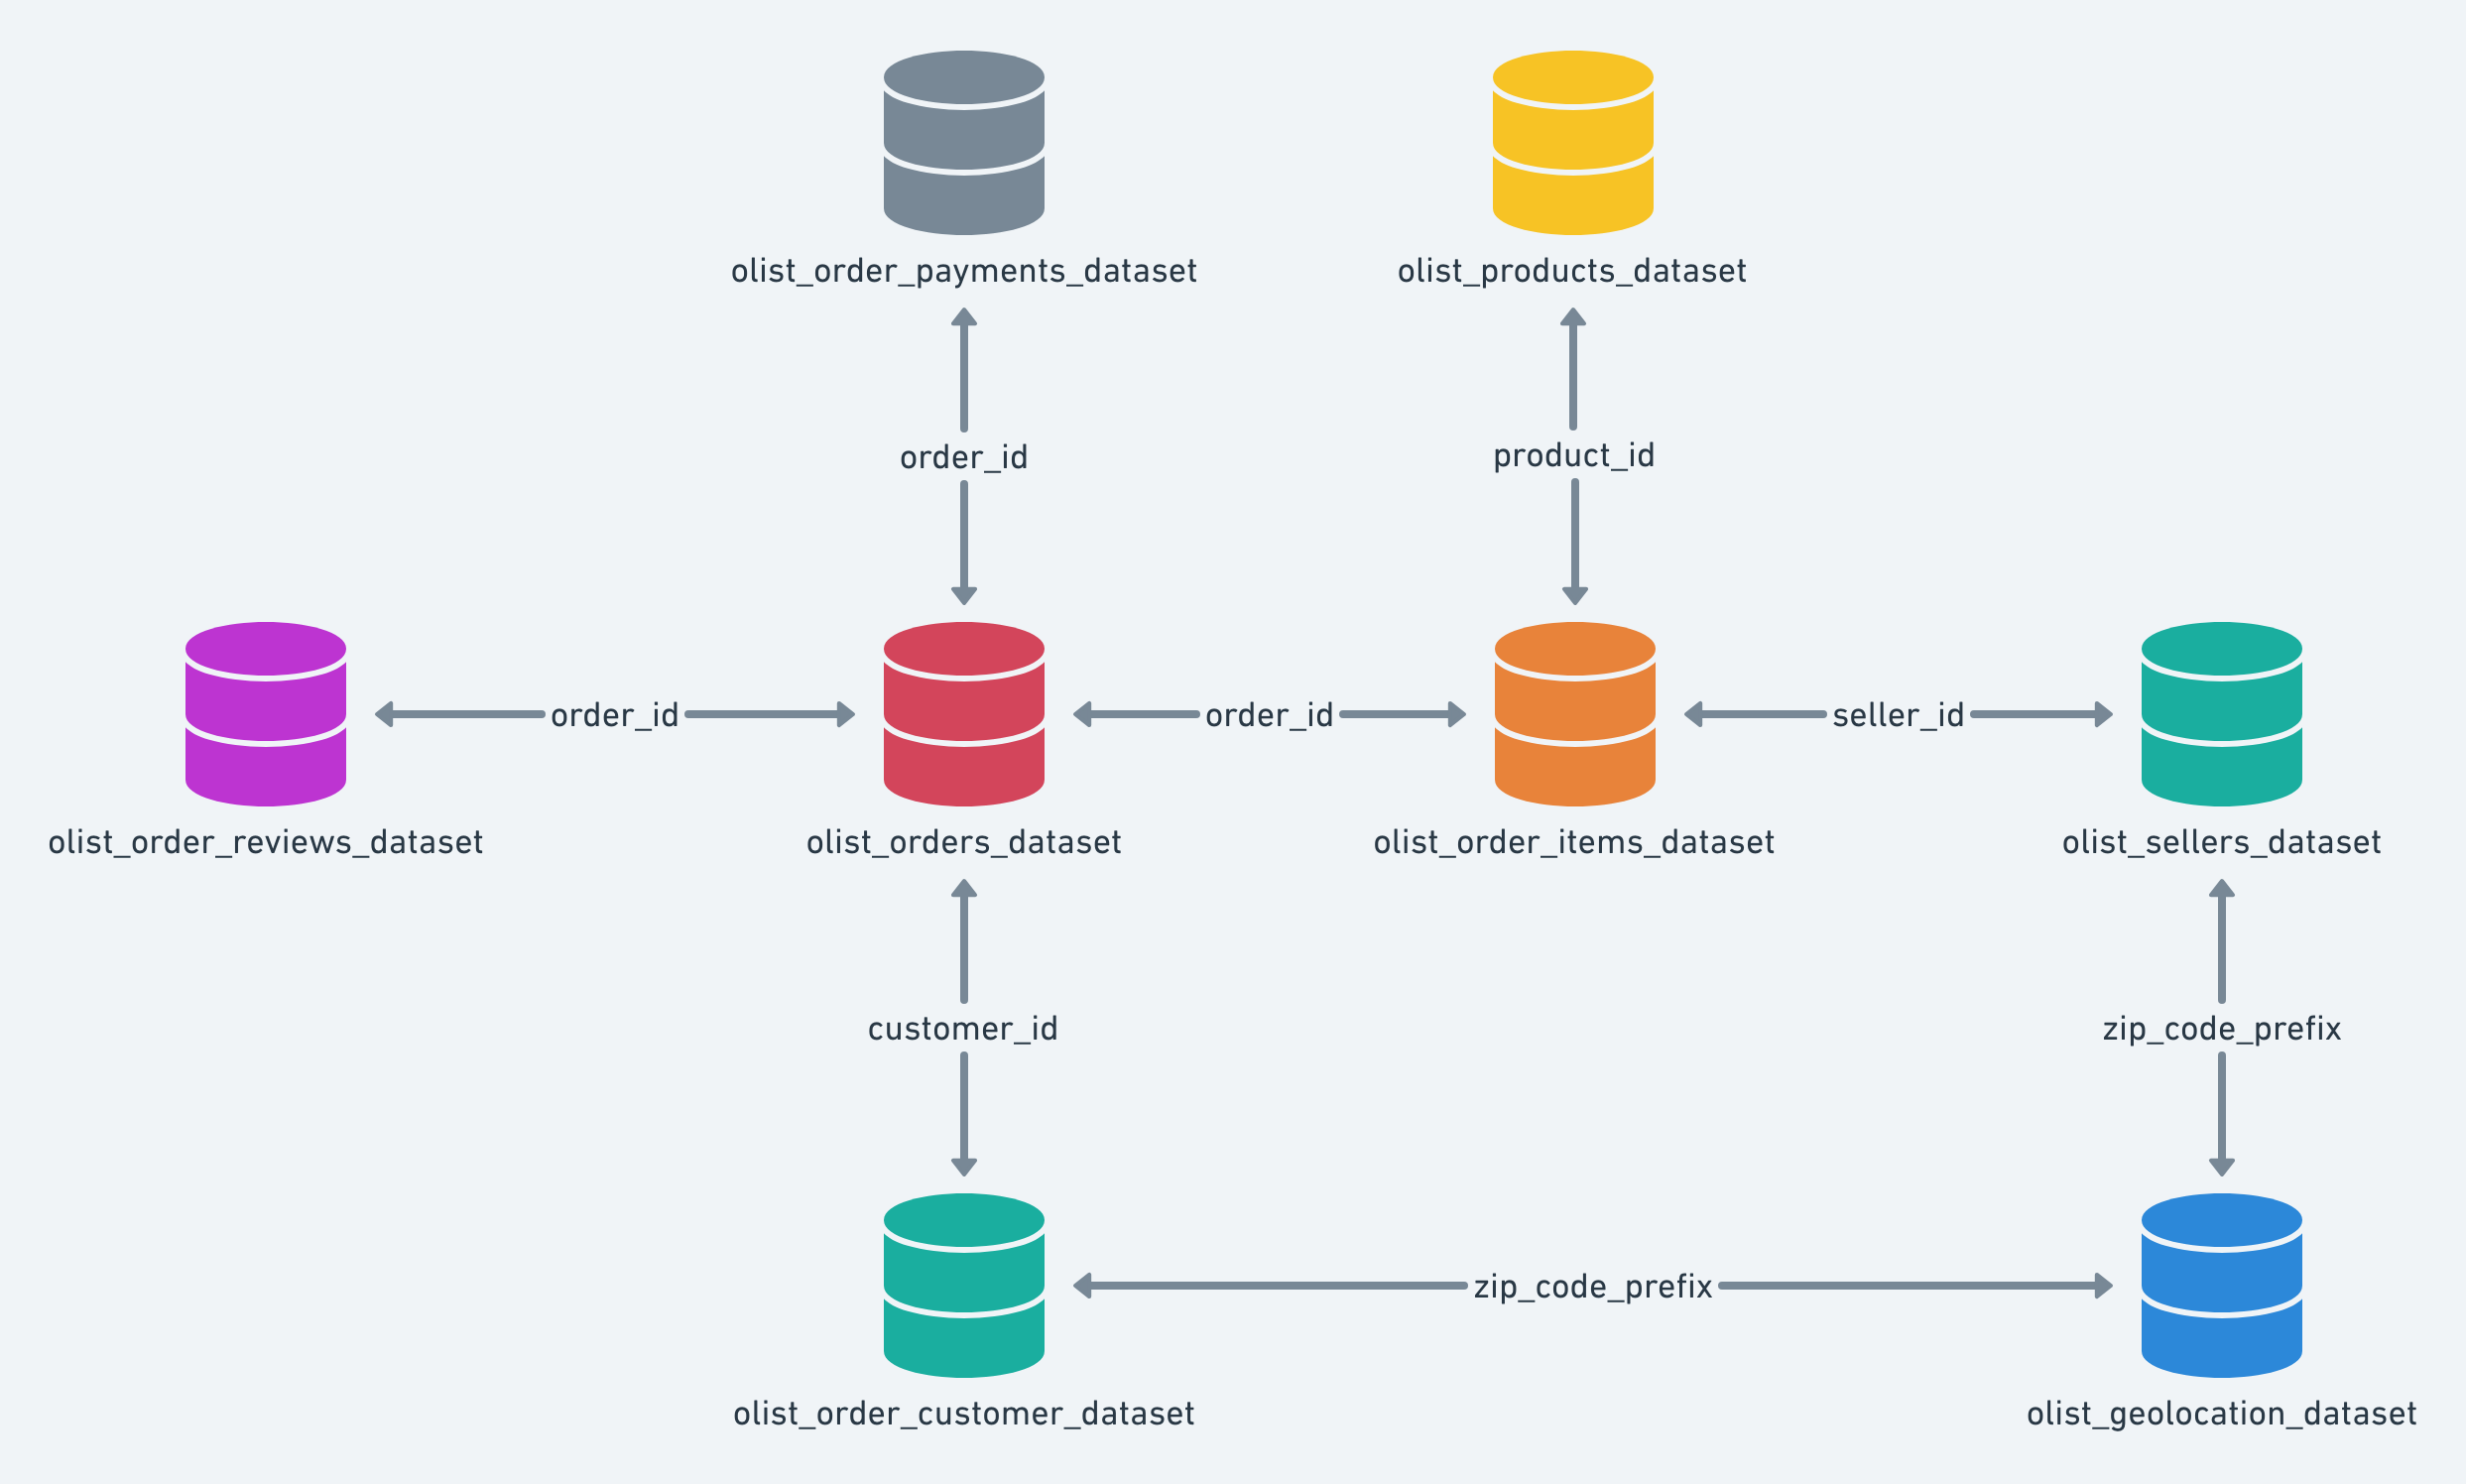

In [210]:
#join data yang dibutuhkan
data = pd.read_sql_query(
    '''
    SELECT 
       *
    FROM 
        olist_order_customer_dataset a
    inner join 
        olist_order_dataset b 
    on   a.customer_id = b.customer_id
    inner join
        olist_order_items_dataset c
    on  b.order_id = c.order_id
    inner join
        olist_products_dataset d
    on  c.product_id = d.product_id
    inner join 
        olist_order_payments_dataset e
    on  b.order_id = e.order_id
    inner join 
        olist_sellers_dataset f
    on c.seller_id = f.seller_id
    inner join 
        product_category_name_translation g
    on d.product_category_name = g.product_category_name
    ''',
    conn
)

In [211]:
data.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index,order_id,payment_sequential,payment_type,payment_installments,payment_value,index,seller_id,seller_zip_code_prefix,seller_city,seller_state,index,product_category_name,product_category_name_english
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,373,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,32209,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,19778,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,1182,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,30,moveis_escritorio,office_furniture
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,17931,29150127e6685892b6eab3eec79f59c7,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,4737,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,33639,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,2323,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,7,utilidades_domesticas,housewares
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,78217,b2059ed67ce144a36e2aa97d2c9e9ad2,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,9407,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,73071,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,1182,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,30,moveis_escritorio,office_furniture
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,65237,951670f92359f4fe4a63112aa7306eba,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,6500,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,6981,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,1182,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,30,moveis_escritorio,office_furniture
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,47297,6b7d50bd145f6fc7f33cebabd7e49d0f,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,29553,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,82770,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,2463,4a3ca9315b744ce9f8e937436149

In [212]:
#drop index
data = data.drop("index",axis=1)

# Data Quality Check

In [213]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,payment_sequential,payment_type,payment_installments,payment_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,29150127e6685892b6eab3eec79f59c7,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,b2059ed67ce144a36e2aa97d2c9e9ad2,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,951670f92359f4fe4a63112aa7306eba,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,6b7d50bd145f6fc7f33cebabd7e49d0f,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,casa_conforto,home_confort


In [214]:
data['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

disini kita melihat bahwa terdapat kolom order status. agar sesuai dengan objective analisis, maka akan dilakukan filter untuk order status yang telah delivered atau sudah diterima pemesanannya oleh customer

In [215]:
# filter status order
data = data.query("order_status == 'delivered'")

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113384 entries, 0 to 115877
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113384 non-null  object 
 1   customer_unique_id             113384 non-null  object 
 2   customer_zip_code_prefix       113384 non-null  int64  
 3   customer_city                  113384 non-null  object 
 4   customer_state                 113384 non-null  object 
 5   order_id                       113384 non-null  object 
 6   customer_id                    113384 non-null  object 
 7   order_status                   113384 non-null  object 
 8   order_purchase_timestamp       113384 non-null  object 
 9   order_approved_at              113370 non-null  object 
 10  order_delivered_carrier_date   113382 non-null  object 
 11  order_delivered_customer_date  113376 non-null  object 
 12  order_estimated_delivery_date 

beberapa product tidak teridentifikasi category dan nama productnya, karena objective akan dilakukan analisis product performance, maka product id yang tidak memiliki category name akan didrop

dari sini kita melihat bahwa terdapat missing pada kolom order_delivered_customer_date, karena pada deskripsi kolom tersebut menjelaskan tentang tanggal dimana customer telah menerima pesanannya, maka jika missing, menandakan bahwa customer belum menerima pesanannya, sehingga tidak akan dimasukkan kedalam analisis

In [217]:
#mengambil colom yang dibutuhkan 
data = data.drop(["order_status",
                  'order_approved_at',
                  'product_name_lenght',
                  'product_description_lenght',
                  'product_photos_qty',
                  'product_weight_g',
                  'product_length_cm',
                  'product_height_cm',
                  'seller_zip_code_prefix',
                  'product_category_name',
                  'seller_city',
                  'seller_state',
                  'seller_id',
                  'seller_zip_code_prefix',
                  'seller_city',
                  'payment_sequential',
                  'payment_type',
                  'payment_installments',
                  'customer_zip_code_prefix',
                  'product_id',
                  'product_width_cm',
                  'customer_id'],
                  axis=1)

In [218]:
data.head()

,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,shipping_limit_date,price,freight_value,order_id,payment_value,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-22 15:22:12,124.99,21.88,00e7ee1b050b8499577073aeb2a297a1,146.87,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,29150127e6685892b6eab3eec79f59c7,1,2018-01-18 20:58:32,289.00,46.48,29150127e6685892b6eab3eec79f59c7,335.48,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,b2059ed67ce144a36e2aa97d2c9e9ad2,1,2018-06-05 16:19:10,139.94,17.79,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,951670f92359f4fe4a63112aa7306eba,1,2018-03-27 16:31:16,149.94,23.36,951670f92359f4fe4a63112aa7306eba,173.30,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,6b7d50bd145f6fc7f33cebabd7e49d0f,1,2018-07-31 10:10:09,230.00,22.25,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25,home_confort


In [220]:
#membersihkan colom duplicated
data = data.loc[:, ~data.columns.duplicated()]

In [221]:
data.head()

,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,payment_value,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,2017-05-22 15:22:12,124.99,21.88,146.87,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,2018-01-18 20:58:32,289.00,46.48,335.48,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,2018-06-05 16:19:10,139.94,17.79,157.73,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,2018-03-27 16:31:16,149.94,23.36,173.30,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,2018-07-31 10:10:09,230.00,22.25,252.25,home_confort


In [222]:
# check inconsistent data
for x in data.columns:
    print(f"===={x}=======")
    print(f"{data[x].unique()} \n")

====customer_unique_id=======
['861eff4711a542e4b93843c6dd7febb0' '290c77bc529b7ac935b93aa66c333dc3'
 '060e732b5b29e8181a18229c7b0b2b5e' ... 'e9f50caf99f032f0bf3c55141f019d99'
 '73c2643a0a458b49f58cea58833b192e' '84732c5050c01db9b23e19ba39899398'] 

====customer_city=======
['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro'] 

====customer_state=======
['SP' 'SC' 'PR' 'MG' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR'] 

====order_id=======
['00e7ee1b050b8499577073aeb2a297a1' '29150127e6685892b6eab3eec79f59c7'
 'b2059ed67ce144a36e2aa97d2c9e9ad2' ... 'fed4434add09a6f332ea398efd656a5c'
 'e31ec91cea1ecf97797787471f98a8c2' '28db69209a75e59f20ccbb5c36a20b90'] 

====order_purchase_timestamp=======
['2017-05-16 15:05:35' '2018-01-12 20:48:24' '2018-05-19 16:07:45' ...
 '2018-04-08 20:11:50' '2017-11-03 21:08:33' '2017-12-19 14:27:23'] 

====order_delivered_carrier_date=======


In [223]:
# Handle Inconsistent data
data['product_category_name_english'] = data['product_category_name_english'].replace('home_confort','home_comfort')
data['product_category_name_english'] = data['product_category_name_english'].replace('fashio_female_clothing', 'fashion_female_clothing')
data['product_category_name_english'] = data['product_category_name_english'].replace('la_cuisine' , 'kitchen')
data['product_category_name_english'].unique()

array(['office_furniture', 'housewares', 'home_comfort', 'sports_leisure',
       'computers_accessories', 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashion_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu_ray

# Analisis

In [224]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

In [225]:
# Add Month and Year Column based on purchase to check trend
data['Month'] = pd.DatetimeIndex(data['order_purchase_timestamp']).month
data['Year'] =  pd.DatetimeIndex(data['order_purchase_timestamp']).year
data['Day'] = data['order_purchase_timestamp'].dt.day_name()

In [226]:
# Check total order per year
data.groupby(['Year'])['order_item_id'].count().reset_index()

,Year,order_item_id
0,2016,329
1,2017,51209
2,2018,61846


In [227]:
# Total order each month
data.groupby(data['order_purchase_timestamp'].dt.to_period('M'))['order_item_id'].count().reset_index()

,order_purchase_timestamp,order_item_id
0,2016-10,328
1,2016-12,1
2,2017-01,951
3,2017-02,1905
4,2017-03,3014
5,2017-04,2628
6,2017-05,4162
7,2017-06,3627
8,2017-07,4655
9,2017-08,4974


In [228]:
#filter data diatas tahun
data = data[data['order_purchase_timestamp']>'2016-12-31']

<Axes: xlabel='order_purchase_timestamp'>

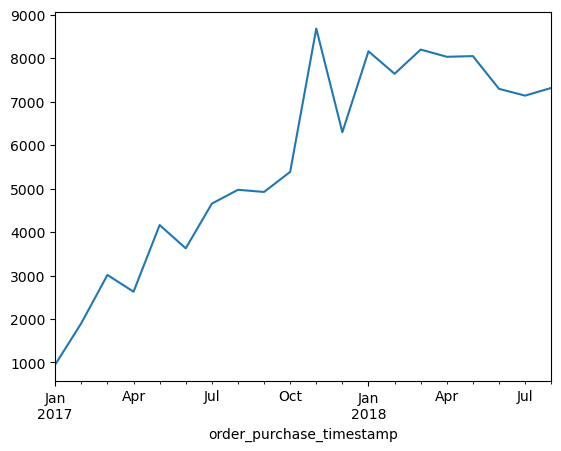

In [229]:
# Total order each month
data.groupby(data['order_purchase_timestamp'].dt.to_period('M'))['order_item_id'].count().plot()

Berdasarkan hasil groupby di atas, dapat dilihat bahwa jumlah pesanan pada setiap bulannya cukup fluktuatif, dengan peningkatan yang cukup signifikan pada November 2017 dan Januari 2018. Hal ini mungkin dapat diakibatkan oleh periode liburan pada akhir tahun dan awal tahun, yang biasanya diikuti dengan banyaknya promosi dan diskon dari penjual. Namun, secara keseluruhan, jumlah pesanan di tahun 2018 menunjukkan tren yang stabil dan konsisten dengan sekitar 7.500 - 8.500 pesanan setiap bulannya. Informasi ini dapat membantu bisnis dalam merencanakan strategi pemasaran dan promosi yang lebih efektif berdasarkan trend penjualan pada setiap bulannya.

Text(0.5, 1.0, 'Count of Orders based on Days')

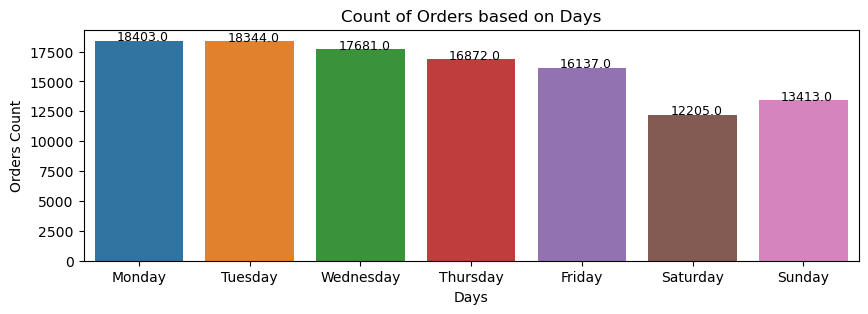

In [230]:
# Count of orders based on days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
plt.figure(figsize=(10,3))
daysorder = sns.countplot(data=data, x='Day',order = order)
for bar in daysorder.patches:
        count = bar.get_height()
        x = bar.get_x() + bar.get_width()/4
        y = bar.get_y() + bar.get_height()+10
        daysorder.annotate(count, (x, y), size = 9)

plt.xlabel('Days')
plt.ylabel('Orders Count')
plt.title('Count of Orders based on Days')

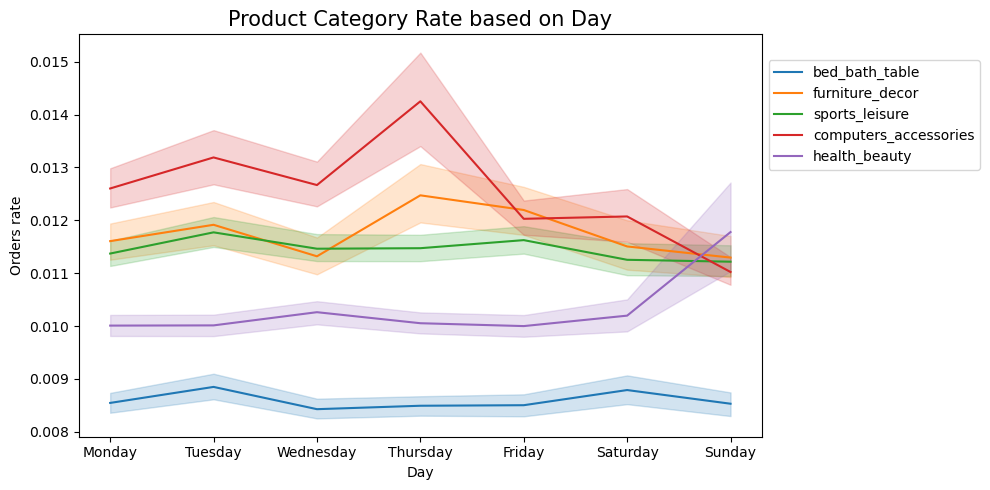

In [231]:
# Order per product category based on days
plt.figure(figsize = [10,5])
prodper = data.loc[data['product_category_name_english'].isin(data['product_category_name_english'].value_counts().nlargest().index.tolist())]
totalcat = prodper.groupby('product_category_name_english').sum('order_item_id').reset_index()
prodper= pd.merge(prodper, totalcat, on = 'product_category_name_english', how ='left')
prodper['avg'] = prodper['order_item_id_x']/prodper['order_item_id_y']*100
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
prodper['Day_id'] = prodper.index
prodper['Day_id'] = prodper['Day'].map(sorterIndex)
prodper = prodper.sort_values(by = 'Day_id')
sns.lineplot(data=prodper, x='Day', y='avg', hue='product_category_name_english').set_title('Product Category Rate based on Day', size=15)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.ylabel('Orders rate')
plt.tight_layout()
plt.show()

## Cohort Analysis

In [232]:
import datetime as dt
# Dataset preparation
dataset2 = pd.merge(data, data.groupby('customer_unique_id',as_index=False)['order_purchase_timestamp'].min().rename(columns ={'order_purchase_timestamp':'first_purchase'}), on = 'customer_unique_id', how = 'left')
dataset2['first_purchase'] = dataset2['first_purchase'].apply(lambda row : dt.datetime(row.year, row.month, 1))

Ydifference = dataset2['Year'] - dataset2['first_purchase'].dt.year
Mdifference = dataset2['order_purchase_timestamp'].dt.month - dataset2['first_purchase'].dt.month
dataset2['month_index'] = Ydifference*12 + Mdifference + 1
cohort = dataset2.groupby(['first_purchase','month_index'])
cohort = cohort['customer_unique_id'].apply(pd.Series.nunique).reset_index()
cohort['first_purchase'] = cohort['first_purchase'].dt.to_period('M')
cohort.head()

,first_purchase,month_index,customer_unique_id
0,2017-01,1,709
1,2017-01,2,2
2,2017-01,3,2
3,2017-01,4,1
4,2017-01,5,3


In [233]:
# Pivot - data prep
cohortpivot = pd.pivot_table(data = cohort, index = 'first_purchase', columns = 'month_index', values = 'customer_unique_id',aggfunc= 'sum', \
                     margins = True, margins_name='Total')
cohortpercentage = cohortpivot.apply(lambda data: round(data/cohortpivot.loc[:,1]*100,2))
cohortpercentage

month_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,Total
first_purchase,,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.28,0.28,0.14,0.42,0.14,0.42,0.14,NaN,NaN,0.42,0.14,0.56,0.42,0.14,0.14,0.28,0.42,0.14,104.51
2017-02,100.0,0.19,0.32,0.06,0.44,0.13,0.25,0.19,0.13,0.19,0.13,0.32,0.13,0.19,0.13,0.06,0.06,0.19,NaN,103.10
2017-03,100.0,0.45,0.37,0.37,0.37,0.16,0.16,0.33,0.33,0.08,0.33,0.12,0.20,0.12,0.16,0.24,0.08,0.12,NaN,103.99
2017-04,100.0,0.64,0.23,0.18,0.27,0.27,0.32,0.32,0.32,0.18,0.27,0.09,0.05,0.05,0.09,0.09,0.14,NaN,NaN,103.51
2017-05,100.0,0.47,0.44,0.30,0.30,0.33,0.41,0.15,0.24,0.24,0.27,0.30,0.24,0.03,0.15,0.21,NaN,NaN,NaN,104.06
2017-06,100.0,0.50,0.37,0.44,0.30,0.40,0.33,0.23,0.13,0.17,0.30,0.33,0.17,0.17,0.23,NaN,NaN,NaN,NaN,104.08
2017-07,100.0,0.54,0.32,0.24,0.27,0.22,0.32,0.11,0.19,0.27,0.22,0.30,0.13,0.24,NaN,NaN,NaN,NaN,NaN,103.37
2017-08,100.0,0.68,0.35,0.28,0.35,0.53,0.30,0.25,0.15,0.15,0.25,0.20,0.10,NaN,NaN,NaN,NaN,NaN,NaN,103.58
2017-09,100.0,0.68,0.51,0.28,0.46,0.20,0.23,0.25,0.28,0.20,0.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.42


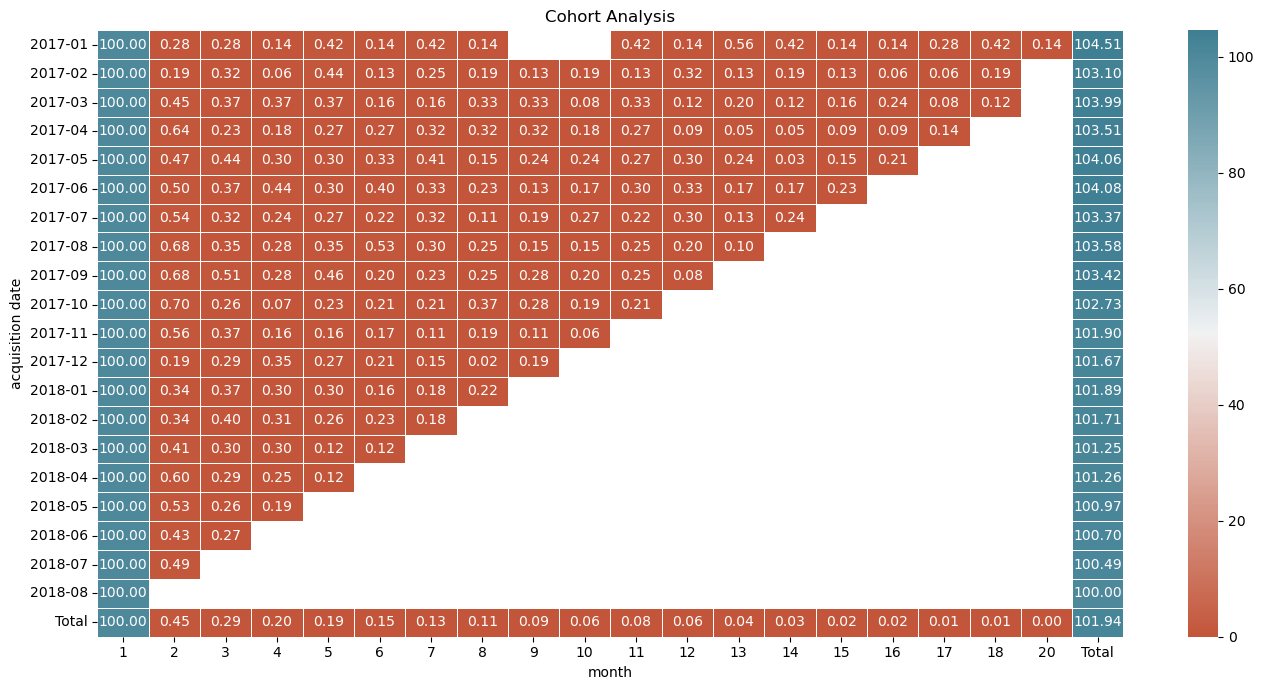

In [234]:
# Customer Retention - Cohort Analysis
palette=sns.diverging_palette(20, 220, n=256)
plt.figure(figsize= (14,7))
sns.heatmap(cohortpercentage, annot=True, fmt='.2f',cmap=palette, linewidths=.5)
plt.title ('Cohort Analysis')
plt.xlabel('month')
plt.ylabel('acquisition date')
plt.tight_layout()
plt.show()

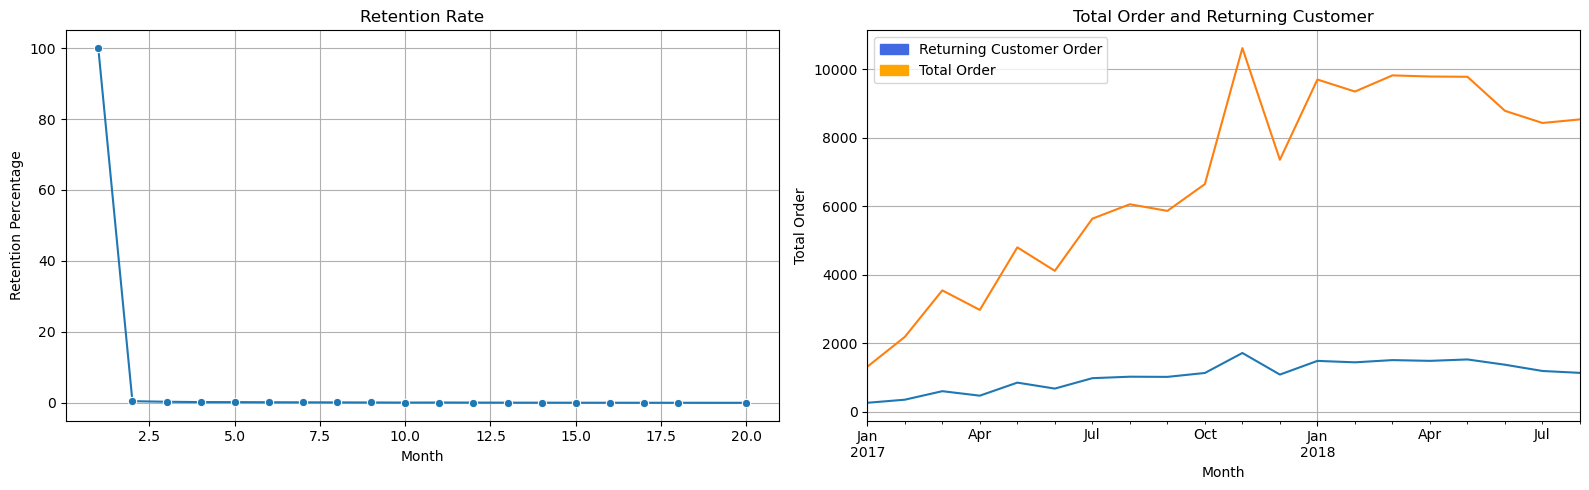

In [235]:
# Retention Plot
plt.figure(figsize = [16,5])
plt.subplot(1,2,1)
retention = cohortpercentage.reset_index()
retention = retention.iloc[-1,1:-1].reset_index()
retention = retention.rename(columns = {20: 'Rate'})
retention['Rate'] = retention['Rate'].astype('float64')
ax = sns.lineplot(data = retention, x = 'month_index', y = 'Rate',marker='o')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Retention Percentage')
plt.title('Retention Rate')
plt.subplot(1,2,2)

total_order = dataset2.set_index('order_purchase_timestamp')['order_item_id'].resample('M').sum()
customeruniquespent = dataset2[dataset2['customer_unique_id'].duplicated() == True].groupby(['customer_unique_id','order_purchase_timestamp']).agg(count = ('order_item_id', len),price_spent = ('price',np.sum)).reset_index()
custuniq= customeruniquespent.set_index('order_purchase_timestamp')['count'].resample('M').sum()
custuniq.plot()
total_order.plot()
Order1 = mpatches.Patch(color='royalblue', label='Returning Customer Order')
Order2 = mpatches.Patch(color='orange', label='Total Order')
plt.legend(handles = [Order1, Order2], loc="upper left")

plt.grid()
plt.xlabel('Month')
plt.ylabel('Total Order')
plt.title('Total Order and Returning Customer')

plt.tight_layout()
plt.show()

# RFM

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113055 entries, 0 to 115877
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             113055 non-null  object        
 1   customer_city                  113055 non-null  object        
 2   customer_state                 113055 non-null  object        
 3   order_id                       113055 non-null  object        
 4   order_purchase_timestamp       113055 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113053 non-null  object        
 6   order_delivered_customer_date  113047 non-null  object        
 7   order_estimated_delivery_date  113055 non-null  object        
 8   order_item_id                  113055 non-null  int64         
 9   shipping_limit_date            113055 non-null  object        
 10  price                          113055 non-null  float64       
 11  

In [237]:
df_rfm = data.loc[:,['customer_unique_id','order_id','order_purchase_timestamp','order_item_id','price']].copy()

In [238]:
df_rfm = df_rfm.rename(columns={"order_item_id":"quantity"})
df_rfm['total_sales'] = df_rfm['quantity'] * df_rfm['price']


df_rfm.head()

,customer_unique_id,order_id,order_purchase_timestamp,quantity,price,total_sales
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,124.99,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,289.00,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,139.94,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,149.94,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,230.00,230.00


In [239]:
reference = df_rfm['order_purchase_timestamp'].max()

In [240]:
df_rfm = df_rfm.drop(['quantity','price'],axis=1)

In [257]:
df_customer = df_rfm.groupby("customer_unique_id").agg({"total_sales":"sum",
                                             "order_id":lambda x: x.nunique()})

df_customer.columns = ["TotalSales","OrderCount"]
df_customer["AvgOrderValue"] = df_customer["TotalSales"]/df_customer["OrderCount"]
df_customer.head()

,TotalSales,OrderCount,AvgOrderValue
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,18.90
0000f46a3911fa3c0805444483337064,69.00,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99,1,25.99
0004aac84e0df4da2b147fca70cf8255,180.00,1,180.00


In [258]:
#ranking
df_rank = df_customer.rank(method='first')

#normalize
df_rank = (df_rank  - df_rank.mean())/df_rank.std()

df_rank.head()

,TotalSales,OrderCount,AvgOrderValue
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.496486,-1.732023,0.531984
0000b849f77a49e4a4ce2b2a4ca5be3f,-1.592368,-1.731985,-1.590444
0000f46a3911fa3c0805444483337064,-0.428884,-1.731947,-0.404288
0000f6ccb0745a6a4b88665a16c9f078,-1.399636,-1.731909,-1.395939
0004aac84e0df4da2b147fca70cf8255,0.944722,-1.731872,0.978523


c:\Users\bayuz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bayuz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bayuz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bayuz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bayuz\anaconda3\lib\site-packages\sklearn\clust

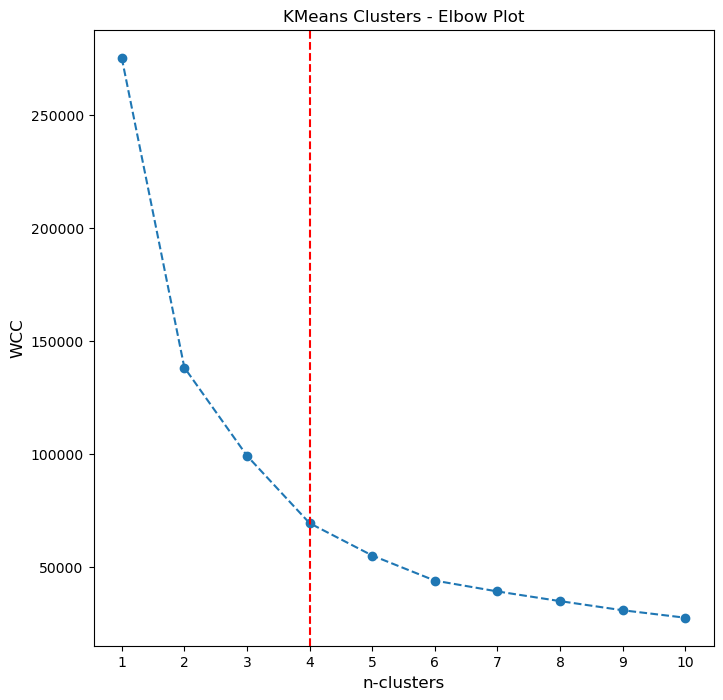

In [259]:
# K_means Clustering

from sklearn.cluster import KMeans

wcc = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(df_rank)
    wcc.append(kmeans.inertia_)
    
#plot
plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcc,marker="o",linestyle="--")
plt.title("KMeans Clusters - Elbow Plot",fontsize=12)
plt.xlabel("n-clusters",fontsize=12)
plt.ylabel("WCC",fontsize=12)
plt.xticks(range(1,11))
plt.axvline(x=4,linestyle="--",color='r');

In [260]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
kmeans.fit(df_rank)

c:\Users\bayuz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [261]:
four_cluster_df = df_rank[['TotalSales', 'OrderCount',
'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

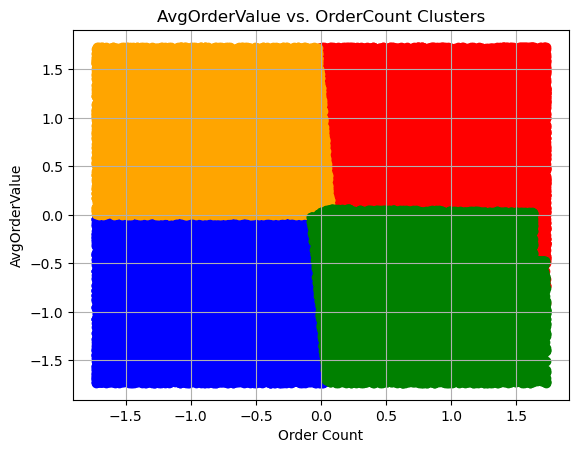

In [262]:
plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
c='blue')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
c='red')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
c='orange')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
c='green')

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('AvgOrderValue')
plt.grid()
plt.show()

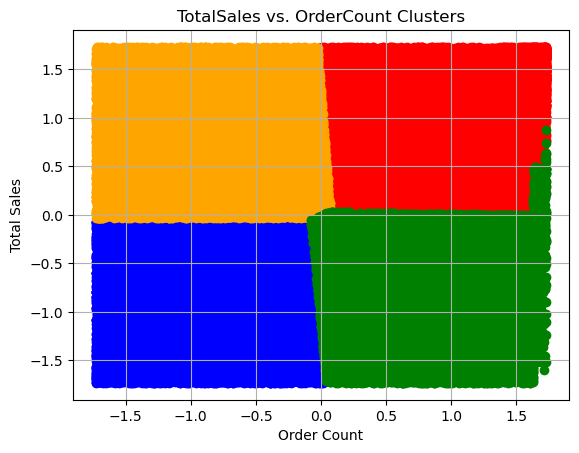

In [263]:
plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
c='blue')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
c='red')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
c='orange')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
c='green')

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

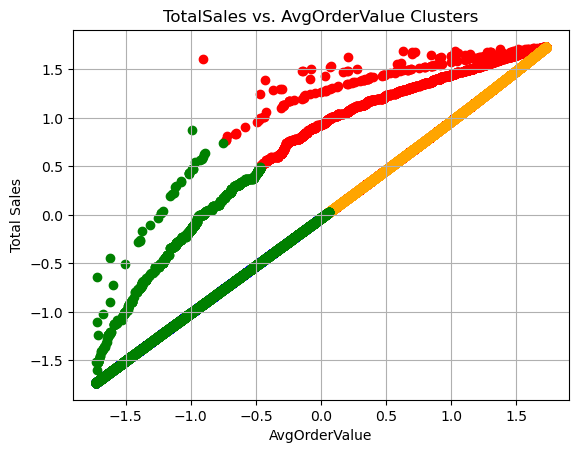

In [264]:
plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
c='blue')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
c='red')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
c='orange')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
c='green')

plt.title('TotalSales vs. AvgOrderValue Clusters')
plt.xlabel('AvgOrderValue')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

In [265]:
#interpretet cluster
df_rank["cluster"] = kmeans.labels_
df_rank.head()

,TotalSales,OrderCount,AvgOrderValue,cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.496486,-1.732023,0.531984,2
0000b849f77a49e4a4ce2b2a4ca5be3f,-1.592368,-1.731985,-1.590444,0
0000f46a3911fa3c0805444483337064,-0.428884,-1.731947,-0.404288,0
0000f6ccb0745a6a4b88665a16c9f078,-1.399636,-1.731909,-1.395939,0
0004aac84e0df4da2b147fca70cf8255,0.944722,-1.731872,0.978523,2


In [270]:
df_customer = df_rfm.groupby("customer_unique_id").agg({"total_sales":"sum",
                                             "order_id":lambda x: x.nunique(),
                                             'order_purchase_timestamp':lambda x: (reference - x.max()).days})

df_customer.columns = ["TotalSales","OrderCount","recency"]
df_customer["AvgOrderValue"] = df_customer["TotalSales"]/df_customer["OrderCount"]


df_customer = df_customer.merge(df_rank['cluster'],left_index=True,right_index=True,how='inner')

df_customer.head()

,TotalSales,OrderCount,recency,AvgOrderValue,cluster
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,111,129.90,2
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,114,18.90,0
0000f46a3911fa3c0805444483337064,69.00,1,536,69.00,0
0000f6ccb0745a6a4b88665a16c9f078,25.99,1,320,25.99,0
0004aac84e0df4da2b147fca70cf8255,180.00,1,287,180.00,2


In [271]:
df_customer.groupby("cluster").agg({"TotalSales":['min','max','mean','median'],
                                    "OrderCount":['min','max','mean','median'],
                                    "AvgOrderValue":['min','max','mean','median'],
                                    "recency":['min','max','mean','median']})

TotalSales                              OrderCount                \
               min       max        mean median        min max      mean   
cluster                                                                    
0             3.54     89.90   47.949953   48.0          1   1  1.000000   
1            92.50  21000.00  298.209453  179.7          1  14  1.097245   
2            89.91  60480.00  274.748258  162.5          1   1  1.000000   
3             0.85    170.38   51.103856   49.9          1   6  1.036149   

               AvgOrderValue                             recency       \
        median           min      max        mean median     min  max   
cluster                                                                 
0          1.0      3.540000     89.9   47.949953   48.0       0  601   
1          1.0     46.052143  21000.0  278.265429  169.9       0  599   
2          1.0     89.910000  60480.0  274.748258  162.5       0  600   
3          1.0      0.850000     95.0   49.593156   49.0       0  601   

                            
               mean median  
cluster                     
0        237.480222  219.0  
1        232.204516  211.0  
2        233.748945  215.0  
3        236.578516  220.0